<div class="alert alert-block alert-info">
<span style="color: rgb(0,53,91);">
<center><img src="https://www.redage.org/sites/default/files/styles/large/public/img-logo-institucion/logo_iteso.jpg?itok=IzloBJS1" style="width:500px;height:142px;" title="Logo ITESO"></center>

<font face = "Times New Roman" size = "6"><b><center>Programacion para Mineria de Datos</center></b></font>
<font face = "Times New Roman" size = "5"><b><center>RandomForest</center></b></font>

<font face = "Times New Roman" size = "5"><b><center>Proyecto Final</center></b></font>
<div align="right"><font face = "Times New Roman" size = "2">nombres: Angel Aceves Manzo</font></div>
<div align="right"><font face = "Times New Roman" size = "2"> Jorge Arturo Ponce Martin</font></div>
<div align="right"><font face = "Times New Roman" size = "2"> Jesus Vargas Pacheco</font></div>
</span></div>

In [2]:
import pandas as pd
import joblib, json
import matplotlib.pyplot as plt

# Cargar modelo
rf = joblib.load("modelo_random_forest.pkl")

with open("expected_columns_rf.json") as f:
    expected_cols = json.load(f)["columns"]

In [8]:
# Cargar nuevos datos preprocesados
df_nuevo = pd.read_csv("../01_preprocessing_results/preprocessing_production/T_new_final.csv")
df_nuevo = df_nuevo[expected_cols]   # asegurar orden

df_nuevo.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Gender___female,Gender___male,...,Payment_Method___bank transfer,Payment_Method___cash on delivery,Payment_Method___credit card,Payment_Method___debit card,Payment_Method___digital wallet,Device_Type___desktop,Device_Type___mobile,Device_Type___tablet,Is_Returning_Customer___False,Is_Returning_Customer___True
0,-0.692877,1.032777,-0.811072,0.176299,-0.444821,0.352530,1.414467,0.314815,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.054198,-0.483213,-1.270369,-0.444324,-0.792460,0.956465,-0.695790,0.737608,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.262991,-0.122821,-0.112807,-0.485023,1.208143,0.173519,0.999320,-0.099657,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.105105,-0.331374,1.299969,-0.746034,1.375707,0.587868,-0.217713,0.718896,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.437961,-0.307147,-0.267445,-0.051726,0.160202,-0.729264,-0.096727,0.052498,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [10]:
# Predicciones
y_pred = rf.predict(df_nuevo)

out = df_nuevo.copy()
out["yhat"] = y_pred
out.to_csv("RandomForest_nuevos_predicciones.csv", index=False)

out.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Gender___female,Gender___male,...,Payment_Method___cash on delivery,Payment_Method___credit card,Payment_Method___debit card,Payment_Method___digital wallet,Device_Type___desktop,Device_Type___mobile,Device_Type___tablet,Is_Returning_Customer___False,Is_Returning_Customer___True,yhat
0,-0.692877,1.032777,-0.811072,0.176299,-0.444821,0.352530,1.414467,0.314815,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,41.46195
1,1.054198,-0.483213,-1.270369,-0.444324,-0.792460,0.956465,-0.695790,0.737608,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,606.76720
2,-0.262991,-0.122821,-0.112807,-0.485023,1.208143,0.173519,0.999320,-0.099657,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1514.19300
3,0.105105,-0.331374,1.299969,-0.746034,1.375707,0.587868,-0.217713,0.718896,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1262.46805
4,-0.437961,-0.307147,-0.267445,-0.051726,0.160202,-0.729264,-0.096727,0.052498,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,467.66680


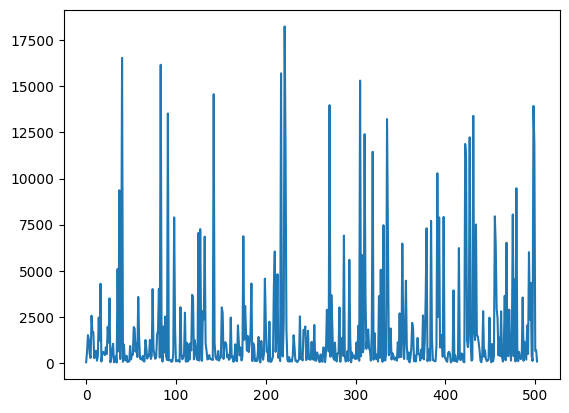

In [7]:
# Graficas
plt.plot(y_pred)
plt.savefig("graficas_RF/rf_predicciones_nuevos.png")